# CREDIT RISK PREDICTION - LANDING COMPANY

Project ini memiliki tujuan untuk memprediksi apakah kredit diterima atau tidak pada suatu landing company. Dengan
adanya prediksi perusahaan dapat melakukan risk management pada loan yang akan diberikan kepada nasabahnya.
Dataset yang digunakan yaitu data pinjaman dari tahun 2007 hingga tahun 2014. Model yang digunakan pada project ini yaitu 
menggunakan model machine learning dan deeplearning. 

# 1. IMPORT DATASET DAN DATA UNDERSTANDING

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

In [2]:
#import dataset
df_credit = pd.read_csv('D:/TUGAS KULIAH/SERTFIKAT/Rakamin Virtual Internship/Minggu 4/loan_data_2007_2014.csv')
df_credit.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12496\3960157542.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_credit = pd.read_csv('D:/TUGAS KULIAH/SERTFIKAT/Rakamin Virtual Internship/Minggu 4/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_credit.shape

(466285, 75)

In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df_credit.nunique()

Unnamed: 0          466285
id                  466285
member_id           466285
loan_amnt             1352
funded_amnt           1354
                     ...  
all_util                 0
total_rev_hi_lim     14612
inq_fi                   0
total_cu_tl              0
inq_last_12m             0
Length: 75, dtype: int64

# 2. DATA PREPROCESSING

Menghilangkan kolom yang tidak diperlukan untuk membuat model

In [6]:
df_credit.drop(['Unnamed: 0','id','member_id'], axis=1, inplace=True)
df_credit.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Memilih variabel yang akan digunakan pada model**

In [7]:
loan = df_credit[['loan_status','loan_amnt','int_rate','grade','emp_length','home_ownership','annual_inc','term','purpose','verification_status','installment']]
loan.head()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term,purpose,verification_status,installment
0,Fully Paid,5000,10.65,B,10+ years,RENT,24000.0,36 months,credit_card,Verified,162.87
1,Charged Off,2500,15.27,C,< 1 year,RENT,30000.0,60 months,car,Source Verified,59.83
2,Fully Paid,2400,15.96,C,10+ years,RENT,12252.0,36 months,small_business,Not Verified,84.33
3,Fully Paid,10000,13.49,C,10+ years,RENT,49200.0,36 months,other,Source Verified,339.31
4,Current,3000,12.69,B,1 year,RENT,80000.0,60 months,other,Source Verified,67.79


In [8]:
loan.isna().sum()

loan_status                0
loan_amnt                  0
int_rate                   0
grade                      0
emp_length             21008
home_ownership             0
annual_inc                 4
term                       0
purpose                    0
verification_status        0
installment                0
dtype: int64

In [9]:
loan.annual_inc = loan.annual_inc.fillna(0)
loan.isna().sum()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12496\2456606301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.annual_inc = loan.annual_inc.fillna(0)


loan_status                0
loan_amnt                  0
int_rate                   0
grade                      0
emp_length             21008
home_ownership             0
annual_inc                 0
term                       0
purpose                    0
verification_status        0
installment                0
dtype: int64

# Feature Engineering

Membuat label dengan loan_status yang dibagi menjadi dua kategori : Pinjaman diterima dan ditolak

- Nilai 0 untuk pinjaman diterima dengan kondisi : 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current'

- Nilai 1 untuk pinjaman ditolak dengan kondisi : 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'

In [10]:
# binary classification
label_category = [(0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
                (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Charged Off', 'Default', 
                     'Does not meet the credit policy. Status:Charged Off'])]

# transformasi function
def classify_label(text):
    for category, matches in label_category:
        if any(match in text for match in matches):
            return category
    return None

loan.loc[:, 'label'] = loan['loan_status'].apply(classify_label)
loan = loan.drop('loan_status', axis=1)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12496\4207083331.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.loc[:, 'label'] = loan['loan_status'].apply(classify_label)


**Mengubah data category menjadi angka atau dummy**

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
#Membuat data str menjadi angka atau dummy
def SC_LabelEncoder1(text):
  if text == 'E' :
    return 1
  elif text == 'D' :
    return 2
  elif text == 'C' :
    return 3
  elif text == 'B' :
    return 4
  elif text == 'A' :
    return 5
  else :
    return 0

def SC_LabelEncoder2(text) :
  if text == '< 1 year' :
    return 1
  elif text == '1 year' :
    return 2
  elif text == '2 year' :
    return 3
  elif text == '3 year' :
    return 4
  elif text == '4 year' :
    return 5  
  elif text == '5 year' :
    return 6
  elif text == '6 year' :
    return 7
  elif text == '7 year' :
    return 8
  elif text == '8 year' :
    return 9
  elif text == '9 year' :
    return 10
  elif text == '10 year' :
    return 11
  elif text == '10+ year' :
    return 12
  else :
    return 0

def SC_LabelEncoder3(text) :
  if text == 'RENT' :
    return 1
  elif text == 'MORTGAGE' :
    return 2
  elif text == 'OWN' :
    return 3
  else :
    return 0

loan['grade'] = loan['grade'].apply(SC_LabelEncoder1)
loan['emp_length'] = loan['emp_length'].apply(SC_LabelEncoder2)
loan['home_ownership'] = loan['home_ownership'].apply(SC_LabelEncoder3)

In [13]:
loan.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term,purpose,verification_status,installment,label
0,5000,10.65,4,0,1,24000.0,36 months,credit_card,Verified,162.87,0
1,2500,15.27,3,1,1,30000.0,60 months,car,Source Verified,59.83,1
2,2400,15.96,3,0,1,12252.0,36 months,small_business,Not Verified,84.33,0
3,10000,13.49,3,0,1,49200.0,36 months,other,Source Verified,339.31,0
4,3000,12.69,4,2,1,80000.0,60 months,other,Source Verified,67.79,0


In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   int_rate             466285 non-null  float64
 2   grade                466285 non-null  int64  
 3   emp_length           466285 non-null  int64  
 4   home_ownership       466285 non-null  int64  
 5   annual_inc           466285 non-null  float64
 6   term                 466285 non-null  object 
 7   purpose              466285 non-null  object 
 8   verification_status  466285 non-null  object 
 9   installment          466285 non-null  float64
 10  label                466285 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 39.1+ MB


In [15]:
loan.isnull().sum()

loan_amnt              0
int_rate               0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
term                   0
purpose                0
verification_status    0
installment            0
label                  0
dtype: int64

# Exploratory Data Analysis

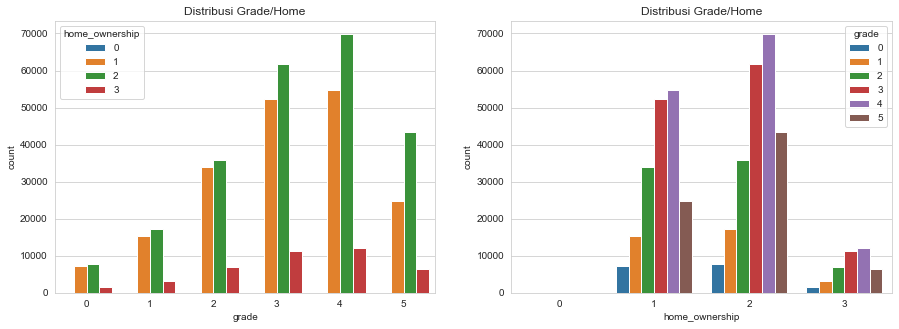

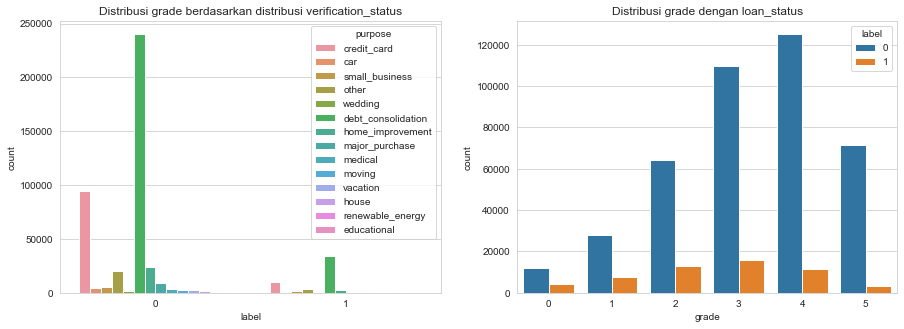

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=loan, x='grade', hue='home_ownership', ax=ax[0]). set_title('Distribusi Grade/Home') ;
sns.countplot(data=loan, x='home_ownership', hue='grade', ax=ax[1]). set_title('Distribusi Grade/Home') ;

fig, ax= plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=loan, x='label', hue='purpose', ax=ax[0]). set_title('Distribusi grade berdasarkan distribusi verification_status') ;
sns.countplot(data=loan, x='grade', hue='label', ax=ax[1]). set_title('Distribusi grade dengan loan_status') ;

# Hasil analisis

1. Jumlah Peminjam dengan grade tinggi akan sedikit dibandingkan dengan grade rendah
2. Sebagian besar tujuan peminjam uang dari label 0 dan 1 adalah debt_consolidation
3. Nilai tertinggi yang mampu menyelesaikan pinjaman adalah grade 4, sedangkan yang paling gagal menyelesaikan pinjaman adalah grade 5

Text(0.5, 1.0, 'Loan_amnt grup berdasarkan purpose')

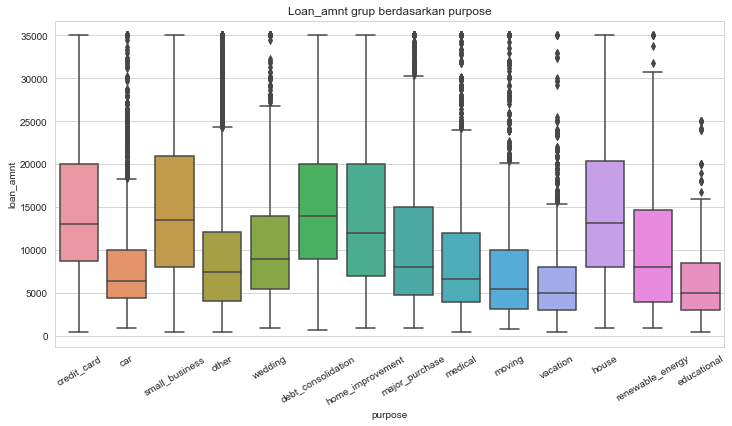

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot (data=loan, x='purpose', y='loan_amnt')
plt.xticks(rotation=30)
plt.title('Loan_amnt grup berdasarkan purpose')

In [ ]:
# Hasil analisis

Ada 5 kategori jumlah kredit tertinggi dengan tujuan sebagai berikut yaitu untuk tujuan Kartu kredit, bisnis UMKM, konsolidasi utang, 
perbaikan rumah, dan membeli rumah sedangkan yang paling terendah memiliki tujuan untuk vacation dan pendidikan.

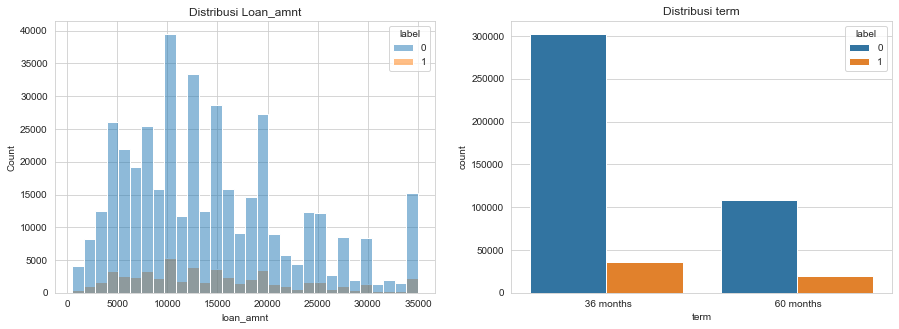

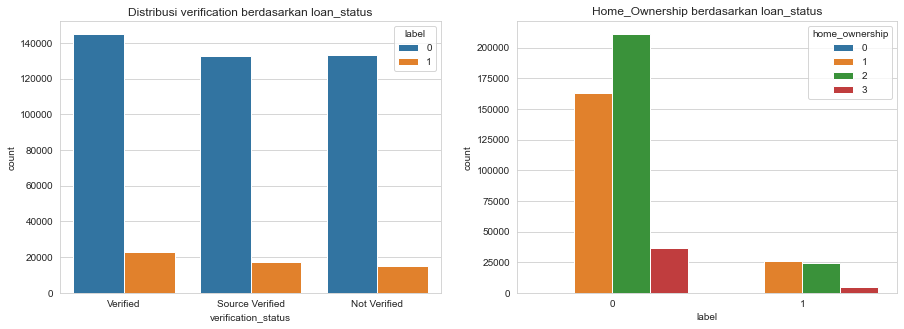

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(loan, x='loan_amnt', hue='label', bins=30, ax=ax[0]). set_title('Distribusi Loan_amnt');
sns.countplot(data=loan, x='term', hue='label', ax=ax[1]). set_title('Distribusi term');

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=loan, x='label', hue='home_ownership', ax=ax[1]). set_title('Home_Ownership berdasarkan loan_status');
sns.countplot(data=loan, x='verification_status', hue='label', ax=ax[0]). set_title('Distribusi verification berdasarkan loan_status');

# Hasil analisis

1. Nilai nominal utang terbesar adalah 10000 USD dan terkecil adalah 30000 USD
2. Jatuh tempo maksimum adalah 36 bulan, sedangkan untuk 60 bulan hampir sepertiganya
3. Sebagian besar kredit yang dapat dibayar penuh diperoleh dari status verifikasi "Terverifikasi"
4. Status kepemilikan rumah terbanyak berdasrkan yang meminjam adalah MORTGAGE dan RENT 

C:\Users\ACER\AppData\Local\Temp\ipykernel_12496\3349534094.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, linewidths=.5, annot=True, cmap='YlGnBu', mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


Text(0.5, 1.0, 'Hitmap korelasi pearson')

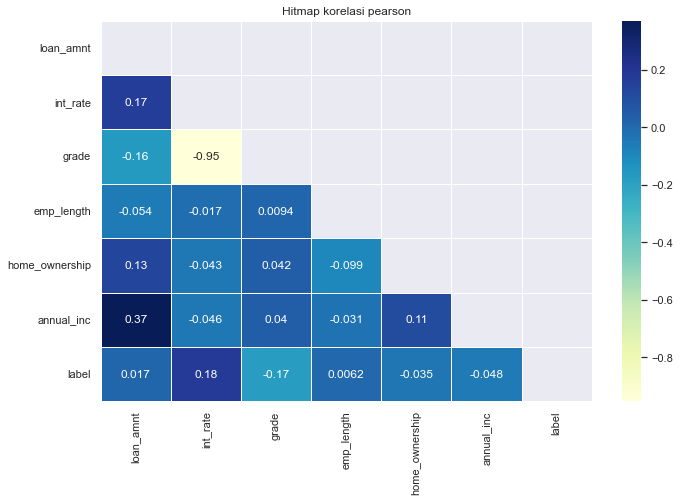

In [19]:
corr = loan[['loan_amnt','int_rate','grade','emp_length','home_ownership','annual_inc','purpose','label']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr, linewidths=.5, annot=True, cmap='YlGnBu', mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title('Hitmap korelasi pearson')

# Hasil analisis

Jumlah kredit sangat tergantung pada pendapatan tahunan peminjam, int_rate dan kepemilikan rumah.

In [ ]:
# DATA MODELING

Pra-processing data untuk discrete column

In [20]:
#encode kolom category lainnya
for col in ['verification_status','purpose','term']:
    le = LabelEncoder()
    le.fit(loan[col])
    loan[col] = le.transform(loan[col])
loan.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term,purpose,verification_status,installment,label
0,5000,10.65,4,0,1,24000.0,0,1,2,162.87,0
1,2500,15.27,3,1,1,30000.0,1,0,1,59.83,1
2,2400,15.96,3,0,1,12252.0,0,11,0,84.33,0
3,10000,13.49,3,0,1,49200.0,0,9,1,339.31,0
4,3000,12.69,4,2,1,80000.0,1,9,1,67.79,0


In [21]:
loan.isnull().sum()

loan_amnt              0
int_rate               0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
term                   0
purpose                0
verification_status    0
installment            0
label                  0
dtype: int64

# CLUSTERING

In [22]:
from sklearn.cluster import KMeans

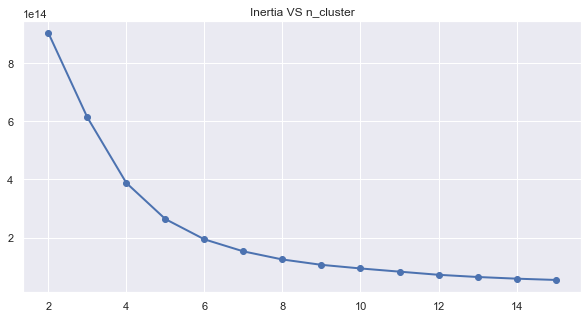

In [23]:
inertias = []

for i in range(2,16) :
  kmeans = KMeans(n_clusters=i, random_state=0).fit(loan)
  inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertia VS n_cluster')
plt.plot(np.arange(2,16),inertias,marker='o', lw=2);

Berdasarkan grafik Elbow diatas cluster yang paling optimal adalah cluster 4

In [24]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(loan)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12496\3014677675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered["Cluster"] = clusters


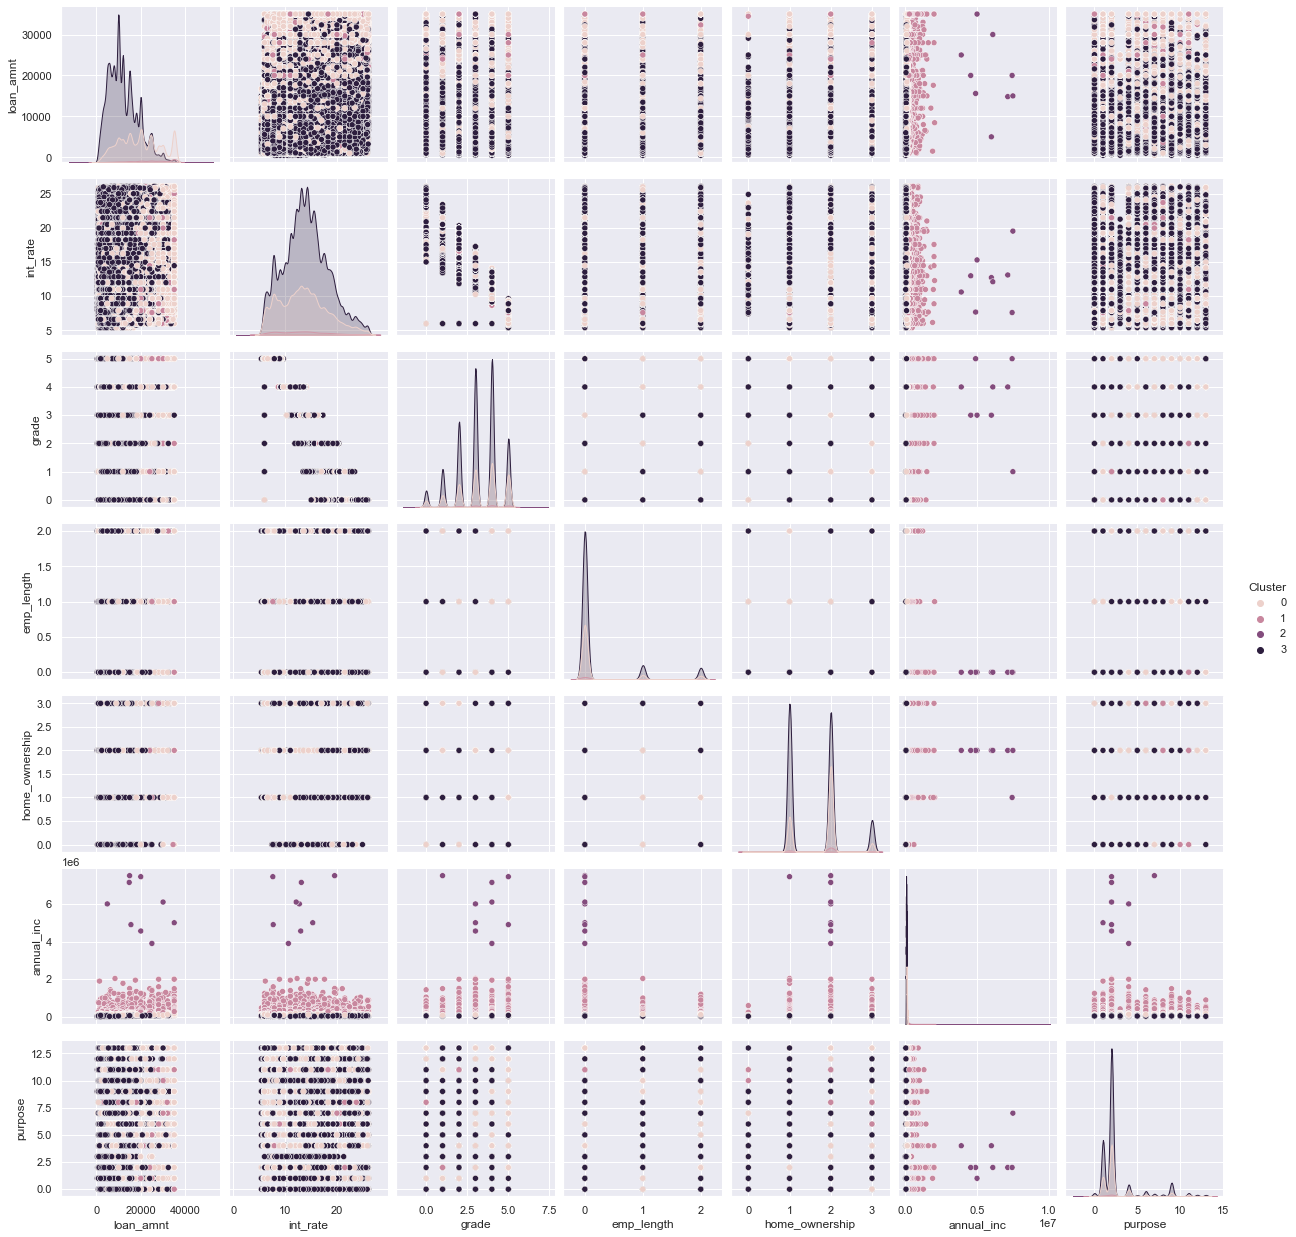

In [25]:
df_clustered = loan[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose'
                           , "Cluster"]], hue="Cluster");

# CREDIT RISK PREDICTION

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = loan.drop(['label'], axis=1)
y = loan['label']

x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split (x_train_valid, y_train_valid, test_size=0.25, random_state=0)

In [28]:
x = loan.drop(['label'], axis=1)
y = loan['label']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [29]:
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
target_names = ['Approved','Not Approved']
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(x_train, y_train)
pred = dummy_clf.predict(x_train)
print(classification_report(y_train, pred))

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94    308155
           1       0.00      0.00      0.00     41558

    accuracy                           0.88    349713
   macro avg       0.44      0.50      0.47    349713
weighted avg       0.78      0.88      0.83    349713



C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Menggunakan Model Logistic Regression

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [31]:
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.88184
        0  1
0  102798  0
1   13774  0


Akurasi dengan menggunakan model logistic regression yaitu sebesar 88,18 persen. Jadi jika menggunakan model ini untuk prediksi apakah kredit diterima atau tidak maka tingkat prediksinya sebesar 88,18 persen

n = 116.572
1. TP = 102798, memprediksi kredit yang diterima dan benar kredit diterima
2. FN = 13774, memprediksi kredit yang tidak diterima dan ternyata kredit diterima
3. FP = 0, memprediksi kredit yang diterima dan ternyata kredit tidak diterima
4. TN = 0, memprediksi kredit tidak diterima dan benar kredit tidak diterima

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error

In [33]:
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.87825
        0    1
0  102214  584
1   13609  165


Akurasi dengan menggunakan model decision tree yaitu sebesar 87,82 persen. Jadi jika menggunakan model ini untuk prediksi apakah kredit diterima atau tidak maka tingkat prediksinya sebesar 87,82 persen

n = 116.572
1. TP = 102214, memprediksi kredit yang diterima dan benar kredit diterima
2. FN = 13609, memprediksi kredit yang tidak diterima dan ternyata kredit diterima
3. FP = 584, memprediksi kredit yang diterima dan ternyata kredit tidak diterima
4. TN = 165, memprediksi kredit tidak diterima dan benar kredit tidak diterima

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.88184
        0  1
0  102798  0
1   13774  0


Akurasi dengan menggunakan model random forest yaitu sebesar 88,18 persen. Jadi jika menggunakan model ini untuk prediksi apakah kredit diterima atau tidak maka tingkat prediksinya sebesar 88,18 persen

n = 116.572
1. TP = 102798, memprediksi kredit yang diterima dan benar kredit diterima
2. FN = 13774, memprediksi kredit yang tidak diterima dan ternyata kredit diterima
3. FP = 0, memprediksi kredit yang diterima dan ternyata kredit tidak diterima
4. TN = 0, memprediksi kredit tidak diterima dan benar kredit tidak diterima

In [38]:
from lightgbm import LGBMClassifier

In [40]:
model = LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
                      )
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.88184
        0  1
0  102798  0
1   13774  0


In [ ]:
Akurasi dengan menggunakan model LGBM yaitu sebesar 88,18 persen. Jadi jika menggunakan model ini untuk prediksi apakah kredit diterima atau tidak maka tingkat prediksinya sebesar 88,18 persen

n = 116.572
1. TP = 102798, memprediksi kredit yang diterima dan benar kredit diterima
2. FN = 13774, memprediksi kredit yang tidak diterima dan ternyata kredit diterima
3. FP = 0, memprediksi kredit yang diterima dan ternyata kredit tidak diterima
4. TN = 0, memprediksi kredit tidak diterima dan benar kredit tidak diterima

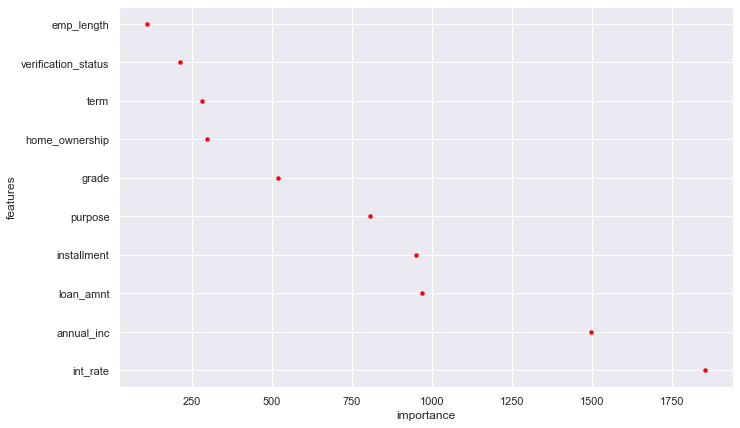

In [44]:
def plot_importance(classifer, x_train, point_size = 25):
    '''plot feature importance'''
    values = sorted(zip(x_train.columns, classifer.feature_importances_), key = lambda x: x[1] * -1)
    imp = pd.DataFrame(values,columns = ["Name", "Score"])
    imp.sort_values(by = 'Score',inplace = True)
    sns.scatterplot(x = 'Score',y='Name', linewidth = 0,
                data = imp,s = point_size, color='red').set(
    xlabel='importance', 
    ylabel='features')
    
plot_importance(model, x_train,20) 

**Berdasarkan tingkat kepentingan pada variabel dapat dilihat bahwa int_rate dan annual_inc memiliki tingkat kepentingan yang paling tinggi. Sehingga dapat disimpulkan bahwa variabel tersebut merupakan feature paling penting untuk membuat prediksi.**

In [45]:
model.booster_.feature_importance(importance_type='gain')

array([ 13569.82351518, 264073.47217321,  56120.58607483,   1191.09994125,
         6919.51812553,  46909.90125513,   5968.48693895,  16419.33031702,
         3816.1369648 ,  15344.80097461])

In [47]:
from xgboost import XGBClassifier

In [48]:
model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.8818
        0   1
0  102788  10
1   13769   5


Akurasi dengan menggunakan model XGBOOST yaitu sebesar 88,18 persen. Jadi jika menggunakan model ini untuk prediksi apakah kredit diterima atau tidak maka tingkat prediksinya sebesar 88,18 persen

n = 116.572
1. TP = 102788, memprediksi kredit yang diterima dan benar kredit diterima
2. FN = 13769, memprediksi kredit yang tidak diterima dan ternyata kredit diterima
3. FP = 10, memprediksi kredit yang diterima dan ternyata kredit tidak diterima
4. TN = 5, memprediksi kredit tidak diterima dan benar kredit tidak diterima

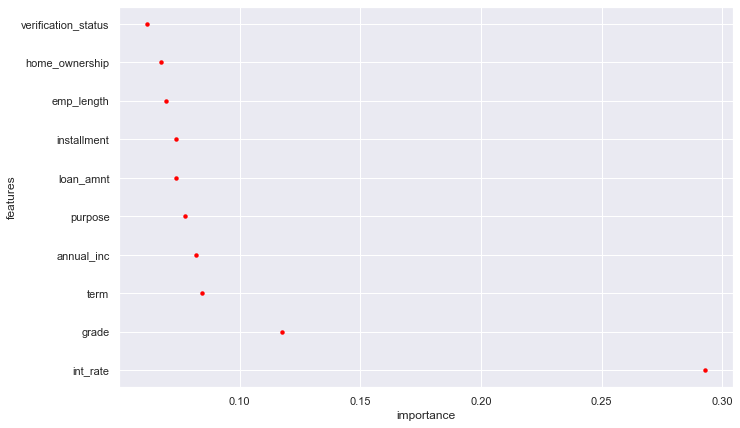

In [50]:
plot_importance(model, x_train, 20)

**Setelah di evaluasi kembali berdasarkan tingkat kepentingan pada variabel dapat dilihat bahwa int_rate memiliki tingkat kepentingan yang paling tinggi. Sehingga dapat disimpulkan bahwa variabel tersebut merupakan feature paling penting untuk membuat prediksi.**

In [52]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('CatBoost Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

0:	learn: 0.5471543	total: 16.7s	remaining: 1h 9m 8s
25:	learn: 0.3216470	total: 1m 39s	remaining: 14m 17s
50:	learn: 0.3044985	total: 3m 14s	remaining: 12m 39s
75:	learn: 0.2915311	total: 4m 39s	remaining: 10m 39s
100:	learn: 0.2801748	total: 6m 9s	remaining: 9m 4s
125:	learn: 0.2701398	total: 7m 41s	remaining: 7m 34s
150:	learn: 0.2625058	total: 9m 18s	remaining: 6m 5s
175:	learn: 0.2552518	total: 10m 57s	remaining: 4m 36s
200:	learn: 0.2469628	total: 12m 33s	remaining: 3m 3s
225:	learn: 0.2399498	total: 14m 6s	remaining: 1m 29s
249:	learn: 0.2332034	total: 15m 40s	remaining: 0us
CatBoost Accuracy Score is 0.87716
        0    1
0  102000  798
1   13522  252


Akurasi dengan menggunakan model CATBOOST dengan 250 iterasi yaitu sebesar 87,71 persen. Jadi jika menggunakan model ini untuk prediksi apakah kredit diterima atau tidak maka tingkat prediksinya sebesar 87,71 persen

n = 116.572
1. TP = 102000, memprediksi kredit yang diterima dan benar kredit diterima
2. FN = 13522, memprediksi kredit yang tidak diterima dan ternyata kredit diterima
3. FP = 798, memprediksi kredit yang diterima dan ternyata kredit tidak diterima
4. TN = 252, memprediksi kredit tidak diterima dan benar kredit tidak diterima

# KESIMPULAN 

Berdasarkan hasil evaluasi model-model diatas. Dapat digunakan model XGBOOST, LGBM, Random Forest, dan Logistic Regression untuk memprediksi apakah kredit diterima atau tidak.
Model tersebut sudah cukup baik karena memberikan tingkat akurasi sebesar 88,18 persen.